In [50]:
import pandas as pd
import tikzplotlib

In [42]:
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%y %H:%M')

In [43]:
df = pd.read_csv("../data/run_state_cumsum_2.csv", delimiter=";", parse_dates=["Date"], date_parser=dateparse)
df

/var/folders/bq/l2q_cb9j6bj21nlxmzykz44r0000gn/T/ipykernel_21484/2985011690.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%y %H:%M')


,State,Date,Cumulative Sum
0,finished,2023-04-24 11:58:00,1
1,finished,2023-04-24 11:58:00,2
2,finished,2023-04-24 12:13:00,3
3,finished,2023-04-24 13:13:00,4
4,failed,2023-04-24 15:03:00,1
...,...,...,...
120,finished,2023-07-20 15:13:00,62
121,crashed,2023-08-07 12:47:00,10
122,failed,2023-08-08 09:08:00,40
123,crashed,2023-08-08 15:26:00,11


In [44]:
df.sort_values(by=["Date"])

,State,Date,Cumulative Sum
0,finished,2023-04-24 11:58:00,1
1,finished,2023-04-24 11:58:00,2
2,finished,2023-04-24 12:13:00,3
3,finished,2023-04-24 13:13:00,4
4,failed,2023-04-24 15:03:00,1
...,...,...,...
120,finished,2023-07-20 15:13:00,62
121,crashed,2023-08-07 12:47:00,10
122,failed,2023-08-08 09:08:00,40
123,crashed,2023-08-08 15:26:00,11


In [45]:
# plot data by State
import matplotlib.pyplot as plt

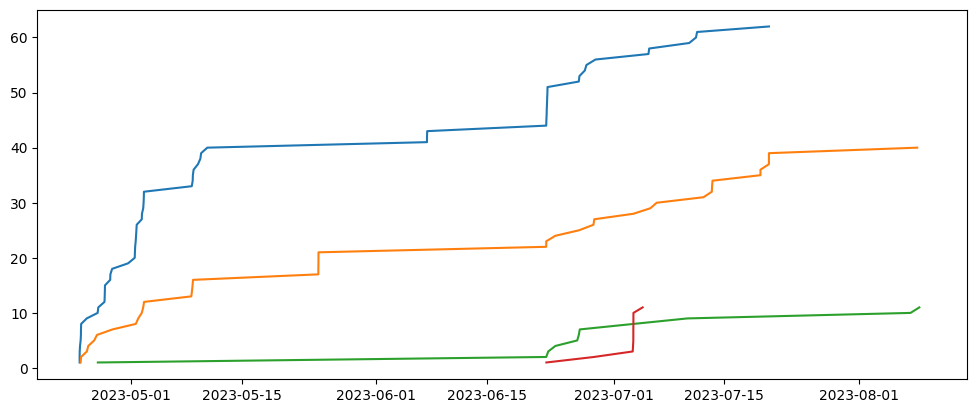

In [74]:
fig, ax = plt.subplots()
states = df["State"].unique()


for state in states:
    ax.plot(df[df["State"].str.contains(state)]["Date"], df[df["State"].str.contains(state)]["Cumulative Sum"], label=state)
# ax.legend()

fig.set_figwidth(12)
tikzplotlib.save("plots/state_per_time.tex", axis_height='5cm', axis_width='12cm')

In [68]:
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

tikzplotlib_fix_ncols(fig)
tikzplotlib.save("plots/state_per_time.tex")

<Figure size 640x480 with 0 Axes>